In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [79]:
df=pd.read_csv('Customer Segmentation.csv')
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [81]:
# To impute missing values for all numerical variables using the mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# For categorical columns, fill with mode
for column in df.select_dtypes(include=['object', 'category']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [85]:
df2 = df[['Age', 'Spending_Score','Family_Size' , 'Work_Experience']]
score_mapping = {'Low': 0, 'Average': 1, 'High': 2}

df['Spending_Score'] = df2['Spending_Score'].map(score_mapping)

In [83]:
label_encoder = preprocessing.LabelEncoder() 
df['Ever_Married'] = df['Ever_Married'].map({'No': 0, 'Yes': 1})
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Graduated'] = df['Graduated'].map({'No': 0, 'Yes': 1})

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,1,0,22,0,Healthcare,1.000000,Low,4.0
1,462643,0,1,38,1,Engineer,2.619777,Average,3.0
2,466315,0,1,67,1,Engineer,1.000000,Low,1.0
3,461735,1,1,67,1,Lawyer,0.000000,High,2.0
4,462669,0,1,40,1,Entertainment,2.619777,High,6.0


In [87]:
df2= df[['Age', 'Spending_Score','Family_Size' , 'Work_Experience']]

In [102]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average')
y_hc = hc.fit_predict(df2)


In [103]:
df['cluster'] = pd.DataFrame(y_hc)

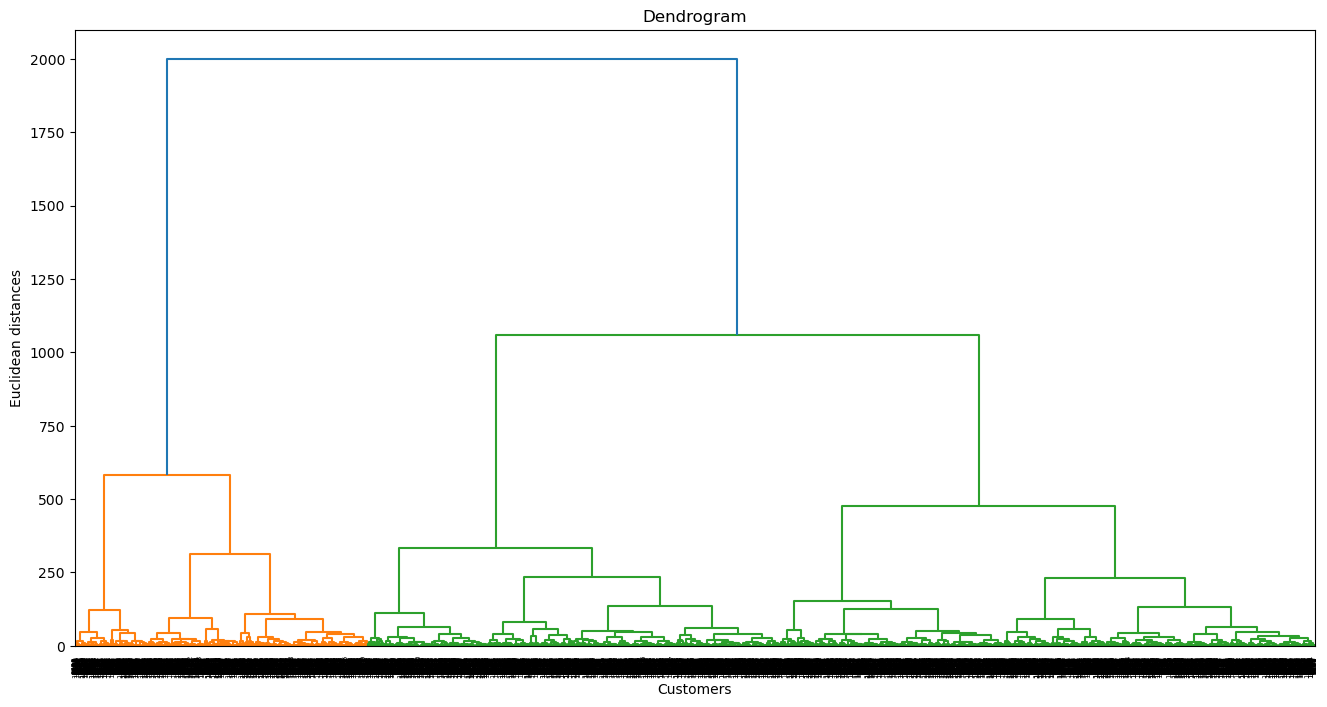

In [91]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df2, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

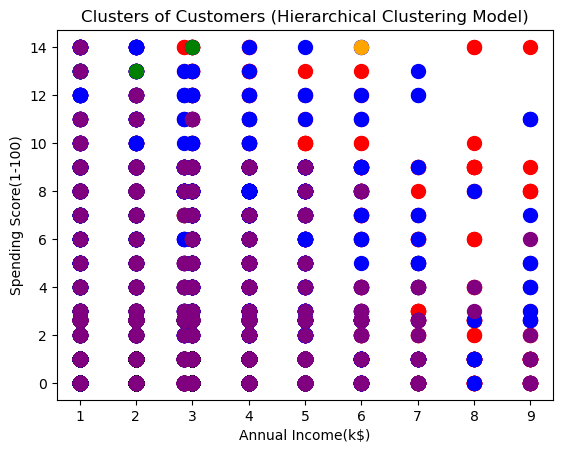

In [114]:
X = df2.iloc[:, [2,3]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [112]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,462809,1,0,22,0,Healthcare,1.000000,0,4.0,0
1,462643,0,1,38,1,Engineer,2.619777,1,3.0,1
2,466315,0,1,67,1,Engineer,1.000000,0,1.0,3
3,461735,1,1,67,1,Lawyer,0.000000,2,2.0,3
4,462669,0,1,40,1,Entertainment,2.619777,2,6.0,1
